In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import proplot as plot

In [17]:
# iap
pre_1 = pd.read_csv('../data/ozonesondes/data/20190725/20190723_0529.csv')
post_1 = pd.read_csv('../data/ozonesondes/data/20190725/20190725_0634.csv')
post_wrfchem_1 = xr.open_dataset('../data/wrfchem/export/20190725/wrfout_d03_2019-07-25_06:00:00_region')
# post_wrfchem_2 = xr.open_dataset('./wrfchem/20200901_era5_0540_samechem.nc')
post_wrfchem_2 = xr.open_dataset('../data/wrfchem/export/20200901/wrfout_d04_2020-09-01_05:40:00_region')

# post_wrfchem_1_00 = xr.open_dataset('./wrfchem/20190725_0000.nc')
# post_wrfchem_2_00 = xr.open_dataset('./wrfchem/20200901_era5_0000.nc')

# vaisala
pre_2 = pd.read_csv('../data/ozonesondes/data/20200901/20200831_234453.csv')
post_2 = pd.read_csv('../data/ozonesondes/data/20200901/20200901_054434.csv')

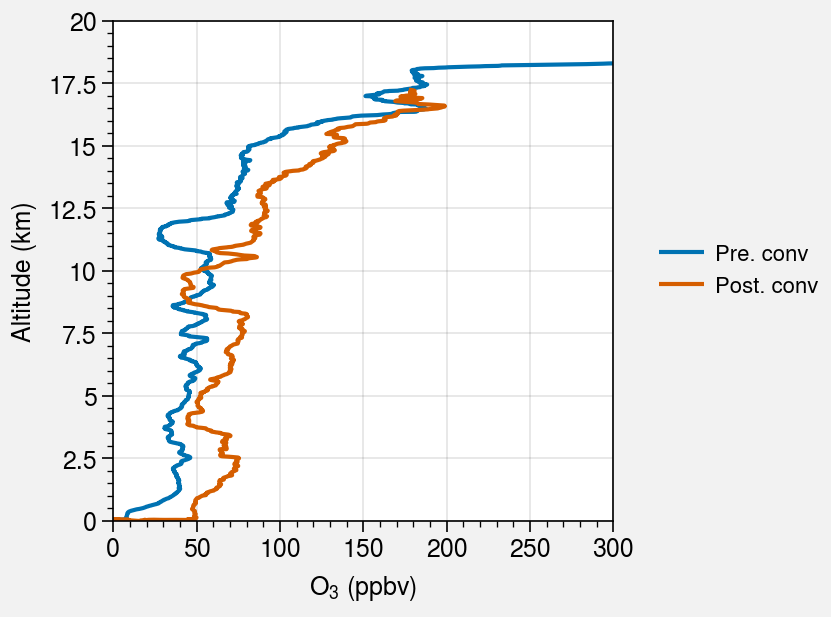

In [18]:
f, axs = plot.subplots()
ascending = post_2['Dropping'] == 0

# ax = axs[0]
ax = axs
lb_1 = ax.plot(pre_2['ppb'], pre_2['GpsHeightMSL']/1e3, label='Pre. conv')
lb_2 = ax.plot(post_2['ppb'][ascending], post_2['HeightFromGps'][ascending]/1e3, label='Post. conv')
ax.format(ylim=(0,20), xlim=(0, 300), xlabel='O$_3$ (ppbv)', ylabel='Altitude (km)')

# ax=axs[1]
# interp_y = np.arange(0, 20, 0.05)*1e3

f.legend([lb_1, lb_2],
         ncols=1,
         frame=False,
         loc='r',
         fontsize=8)

In [19]:
def plot_wrfchem(wrfchem, ax, linestyle='-', quantile=True):
    if linestyle == '-':
        label = 'Post conv. \n WRF-Chem O$_3$'
    else:
        label = 'Pre conv. \n WRF-Chem O$_3$'

    wrfchem_legend = ax.plot(wrfchem['medians'],
                         wrfchem['medians'].level,
                         color='green',
                         linestyle=linestyle,
                         label=label)
    
    if quantile:
        ax.fill_betweenx(wrfchem['medians'].level,
                         wrfchem['quantiles'].sel(quantile=0.05).values,
                         wrfchem['quantiles'].sel(quantile=0.95).values,
                         edgecolor='none', facecolor='gray4')

        ax.fill_betweenx(wrfchem['medians'].level,
                         wrfchem['quantiles'].sel(quantile=0.25).values,
                         wrfchem['quantiles'].sel(quantile=0.75).values,
                         edgecolor='none', facecolor='gray6')

#     twiny_1.plot(
#         post_wrfchem_1['medians'],
#         shadedata=post_wrfchem_1['quantiles'].sel(quantile=[0.25, 0.75]), # dark shading
#         fadedata=post_wrfchem_1['quantiles'].sel(quantile=[0.05, 0.95]), # light shading
#         shadelabel='25% - 75%',
#         fadelabel='5% - 95%',
#         color='ocean blue',
#         barzorder=0,
#         boxmarker=False,
#         legend='ll',
#     )

    return wrfchem_legend

'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


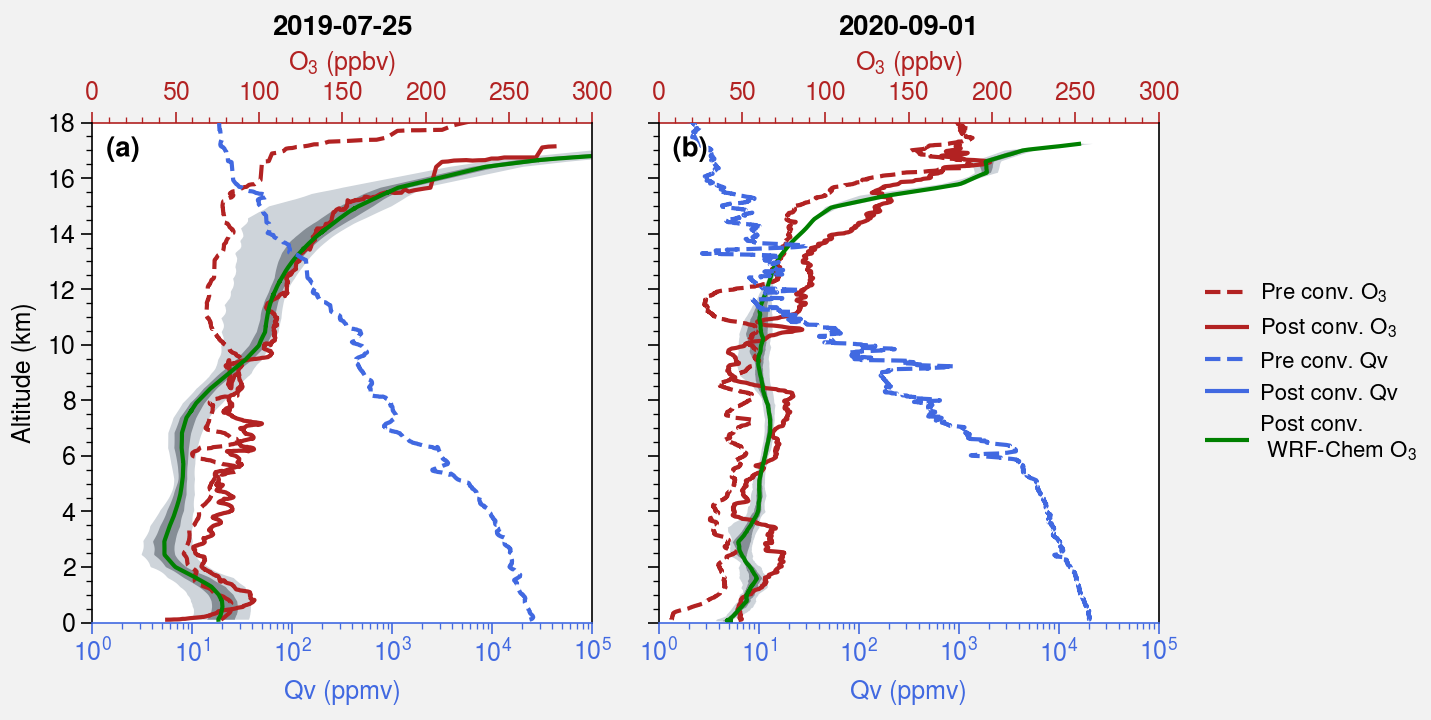

In [20]:
f, axs = plot.subplots(ncols=2, share=0, sharey=3)

# set color
o3_color = 'firebrick'
qv_color = 'royalblue'

# pre-convection
# --- IAP ---
twiny_1 = axs[0].twiny()
pre_o3_1 = twiny_1.plot(pre_1['O3'].values,
                      pre_1['h'].values/1e3,
                      label=r'Pre conv. O$_3$',
                      color=o3_color,
                      linestyle='--')

pre_qv_1 = axs[0].plot(pre_1['QV'].values*1e6,  # ppmv
                       pre_1['h'].values/1e3,
                       label=r'Pre conv. Qv',
                       color=qv_color,
                       linestyle='--')

# --- VAISALA ---
twiny_2 = axs[1].twiny()
surf_above = pre_2['HeightMSL'] > 100
pre_o3_2 = twiny_2.plot(pre_2['ppb'][surf_above].values,
                      pre_2['HeightMSL'][surf_above].values/1e3,
                      label=r'Pre conv. O$_3$',
                      color=o3_color,
                      linestyle='--')

pre_qv_2 = axs[1].plot(pre_2['qv'][surf_above].values*1e6,  # ppmv
                      pre_2['HeightMSL'][surf_above].values/1e3,
                      label=r'Pre conv. Qv',
                      color=qv_color,
                      linestyle='--')

# post_convection
# --- IAP ---
post_o3_1 = twiny_1.plot(post_1['O3'],
                         post_1['h'],
                         label=r'Post conv. O$_3$',
                         color=o3_color)

post_qv_1 = axs[0].plot(post_1['QV']*1e6,
                        post_1['h']/1e3,
                        label=r'Post conv. Qv',
                        color=qv_color)

# --- VAISALA ---
surf_above = post_2['HeightFromGps'] > 100
ascending = post_2['Dropping'] == 0
post_o3_2 = twiny_2.plot(post_2['ppb'][ascending&surf_above].values,
                       post_2['HeightFromGps'][ascending&surf_above].values/1e3,
                       label=r'Post conv. O$_3$',
                       color=o3_color)

# post_qv_2 = axs[1].plot(post_2['qv'][ascending&surf_above].values*1e6,
#                         post_2['HeightFromGps'][ascending&surf_above].values/1e3,
#                         label=r'Post conv. Qv',
#                         color=qv_color)

# --- WRFCHEM ---
wrfchem_1 = plot_wrfchem(post_wrfchem_1, twiny_1)
wrfchem_2 = plot_wrfchem(post_wrfchem_2, twiny_2)
# wrfchem_2_00 = plot_wrfchem(post_wrfchem_2_00, twiny_2, linestyle='--', quantile=False)

# set O3 axis format
twiny_1.format(xcolor='firebrick',
             xlabel=r'O$_3$ (ppbv)',
             xlim=(0, 300),
             ylim=(0, 18),
             ylabel='Altitude (km)')

twiny_2.format(xcolor='firebrick',
             xlabel=r'O$_3$ (ppbv)',
             xlim=(0, 300),
             ylim=(0, 18),
             ylabel='Altitude (km)')

# set Qv axis format
axs.format(abc=True, abcloc='ul', abcstyle='(a)',
          xlim=(1, 1e5), xlabel='Qv (ppmv)',
          xformatter='log', xscale='symlog',
          xgrid=False, ygrid=False,
          xcolor=qv_color,
          collabels=('2019-07-25', '2020-09-01'))

# plot legend
f.legend(pre_o3_1+post_o3_1+pre_qv_1+post_qv_1+wrfchem_1,
         ncols=1,
         frame=False,
         loc='r',
         fontsize=8)

f.savefig('../figures/sonde_profile.pdf')